In [1]:
import os
import pandas as pd

In [2]:
from numpy.random import normal

In [64]:
plt.style.use(['science'])
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
os.chdir(os.path.join(os.getcwd(),'../../..'))
import ExMAS.main
import ExMAS.utils
from ExMAS.transitize import *

In [5]:
from ExMAS.transitize.main import stick_private_to_ms

In [6]:
import json
from ExMAS.utils import *

In [7]:
from ExMAS.transitize import visualizations
from ExMAS.transitize import analysis

In [8]:
params = ExMAS.utils.get_config('ExMAS/data/configs/transit.json')  # load the default

In [61]:
reports[1300]

,0,1,2,3,size
d2d,NaN,895.000000,837.000000,792.000000,1300
dest_walk_time,0.000000,0.000000,10672.000000,20534.000000,1300
fare,6802.027500,5228.905853,5088.899947,4835.583242,1300
ms,NaN,NaN,NaN,90.000000,1300
nRides,1300.000000,30129.000000,30401.000000,62707.000000,1300
orig_walk_time,0.000000,0.000000,11565.000000,23372.000000,1300
p,1300.000000,405.000000,406.000000,400.000000,1300
s2s,NaN,NaN,57.000000,18.000000,1300
test,1.000000,1.000000,1.000000,1.000000,1300
ttrav,566281.000000,734681.000000,713030.750000,645816.250000,1300


In [9]:
reports = dict()
for size in [300,400,500,600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]:
    print(size)
    inData = analysis.load_results(PATH ='transit_results', EXP_NAME = 'size_{}'.format(size))
    inData = analysis.make_report(inData)
    inData.transitize.report['size']=size
    reports[size] = inData.transitize.report.copy()
    

300
400
500
600
700
800
900
1000
1100
1200
1300
1400


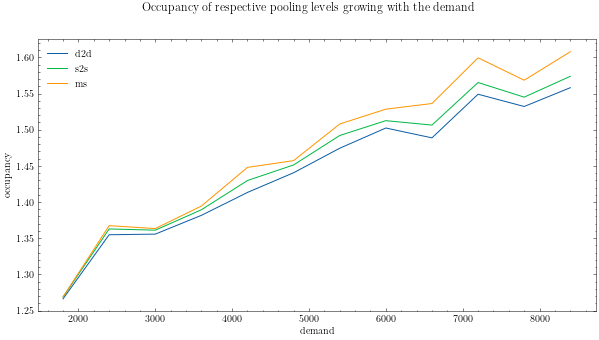

In [78]:
to_plot= dict()
for k,v in reports.items():
    to_plot[k]=v.T.occupancy
df =pd.DataFrame(to_plot)

df = df.T[[1,2,3]]
df.columns = ['d2d','s2s','ms']
df.index = df.index*6
fig, ax = plt.subplots(figsize = (10,5))
df.plot(ax = ax)
ax.set_ylabel('occupancy')
ax.set_xlabel('demand')
_ = fig.suptitle('Occupancy of respective pooling levels growing with the demand')

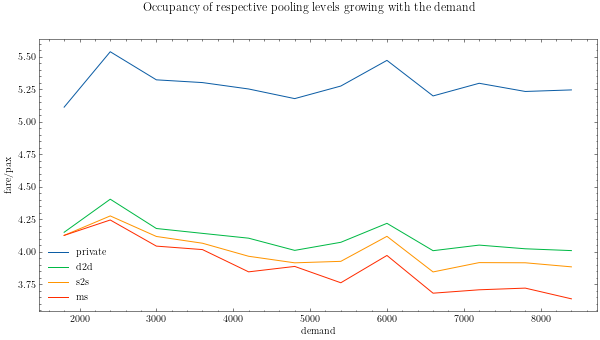

In [90]:
to_plot= dict()
for k,v in reports.items():
    to_plot[k]=v.T.fare/k
df =pd.DataFrame(to_plot)

df = df.T[[0,1,2,3]]
df.columns = ['private','d2d','s2s','ms']
df.index = df.index*6
fig, ax = plt.subplots(figsize = (10,5))
df.plot(ax = ax)
ax.set_ylabel('fare/pax')
ax.set_xlabel('demand')
_ = fig.suptitle('Occupancy of respective pooling levels growing with the demand')

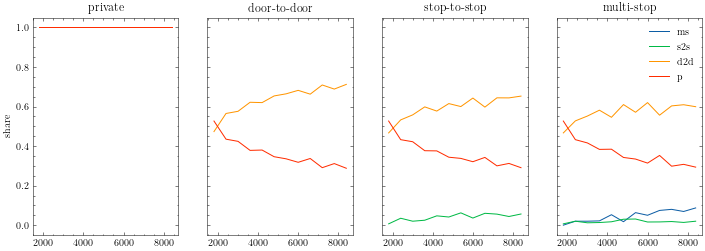

In [85]:
to_plot= dict()
fig, ax = plt.subplots(1,4,figsize = (12,4), sharey = True)
titles = ['private','door-to-door','stop-to-stop','multi-stop']
for sol in [0,1,2,3]:
    for k,v in reports.items():


        to_plot[k*6]={'ms':v[sol].get('ms',0)/k,
                    's2s':v[sol].get('s2s',0)/k,
                   'd2d':v[sol].get('d2d',0)/k,
                   'p':v[sol].get('p',0)/k}
    df =pd.DataFrame(to_plot)

    #df.T[[1,2,3]].div(df.T[1],axis=0).plot()
    ax[sol].set_title(titles[sol])
    df.T.plot(ax = ax[sol])
    if sol == 0:
        ax[sol].set_ylabel('share')
    if sol <3 : 
        ax[sol].get_legend().remove()
        

---

In [84]:
reports[1200]

,0,1,2,3,size
d2d,NaN,851.000000,773.000000,724.000000,1200
dest_walk_time,0.000000,0.000000,13284.000000,23939.000000,1200
fare,6354.379500,4860.662471,4699.108050,4448.183325,1200
ms,NaN,NaN,NaN,96.000000,1200
nRides,1200.000000,32567.000000,32846.000000,117442.000000,1200
orig_walk_time,0.000000,0.000000,13548.000000,24966.000000,1200
p,1200.000000,349.000000,360.000000,358.000000,1200
s2s,NaN,NaN,67.000000,22.000000,1200
test,1.000000,1.000000,1.000000,1.000000,1200
ttrav,529018.000000,689117.000000,661933.375000,593234.875000,1200
